<a href="https://colab.research.google.com/github/FabioPojo1987/FabioPojo1987-MVP_3_DATA_SCIENCE_PUC_RIO/blob/main/MVP3_PUC_Rio_(Fabio_Pojo_de_Almeida).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP Sprint 3: Engenharia de Dados

Trabalho realizado por Fabio Pojo de Almeida


Este é um trabalho acadêmico para fins de conclusão da 3ª (e última) Sprint do Curso de Ciência de Dados da PUC-Rio.

Trabalho elaborado e baseado em dados e informações obtidas acerca da venda de Consoles Nintendo Switch, com base no próprio relatório da Nintendo (presente no link: https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx)

Mas, foi feita uma filtragem de dados e o resultado foi uma nova planilha no Excel, planilha esta que fora armazenada no Bucket da minha conta na AWS (salvo como público para apenas leitura), que é o foco principal do trabalho, no seguinte link: https://fabiopojo1987-mvp3-2025-puc-rio.s3.us-east-2.amazonaws.com/nintendo-switch-consolidated-sales-2017-2024.xlsx

1-Introdução

O Nintendo Switch, é um console de videogame híbrido (pois ele é portátil e também de mesa com o uso da dock), que se assemelha a um tablet. Este aparelho, que atualmente possui 3 versões (Switch Standard, Switch OLED e Switch Lite) foi lançado mundialmente em 03 de março de 2017. Esse aparelho é um dos mais vendidos no mundo. Mas, desta vez, irei colocar o número de consoles, pois este projeto se trata sobre o número de vendas de consoles de Nintendo Switch
O dataset utilizado nesse MVP foi montado a partir da combinação de diversos dados baseados nos que a Nintendo divulga em relação às vendas de seus videogames a cada trimestre (dados estes presentes na página da própria Nintendo, acessível em: http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html e https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx).


Estarei usando apenas dados divulgados oficialmente entre 2017 e 2024 (inseridos para fins de estatística e realização deste trabalho), esta lista consiste especificamente de consoles da linha Nintendo Switch.

As vendas de software do Nintendo Switch têm sido impulsionadas por novos lançamentos e vendas consistentes de títulos mais antigos.

Partindo dessa ideia, resolvi transformar os dados em gráficos para poder analisar e demonstrar como se deu o crescimento das vendas entre os jogos mais populares para o referido console em apenas 7 anos.




Para isso, após realizar o download do arquivo, fiz uma nova planilha (com o mesmo nome da original, por equívoco, mas resolvi não alterar para não apresentar problemas) e fiz upload no bucket da AWS.

Utilizei-me do seguinte código para geração dos gráficos com base na planilha presente na nuvem. Código Python no Colab e com planilha baseada em nuvem da AWS:


Algumas melhorias feitas:
1.	Anotações nos Gráficos: Os valores de unidades vendidas são exibidos diretamente sobre a coluna Y para maior precisão.
2.	Paletas de Cores: Utilização de paletas de cores (tab10, viridis, Set2) para garantir contraste e uma visualização mais limpa.
3.	Ajustes de Tamanho: Aumentado o tamanho dos gráficos para garantir mais clareza.
4.	Grid: Apliquei uma grade mais discreta (linestyle='--'), para não sobrecarregar visualmente e deixar mais limpo.
5.	Ajustes na Legenda: Aumentei a legibilidade dos textos na legenda.


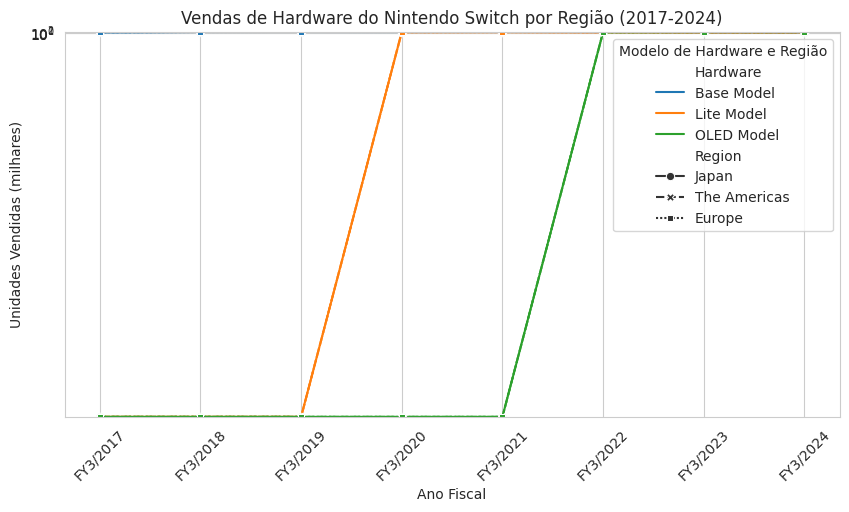

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a planilha no Bucket
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4  # Ignorar as primeiras 4 linhas
)

# Deixar os nomes das colunas limpos
df_hardware.columns = df_hardware.columns.str.strip()

# Ignorar as colunas totalmente vazias e a coluna 'Life to Date'
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

# Converter para formato longo (melt)
df_melted = df_hardware.melt(
    id_vars=['Hardware', 'Region'],
    var_name='Fiscal Year',
    value_name='Units Sold'
)

# Limpar espaços extras
df_melted['Region'] = df_melted['Region'].str.strip()
df_melted['Hardware'] = df_melted['Hardware'].str.strip()

# Substituir valores nulos (NaN) por 0
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# Converter Ano Fiscal para string
df_melted['Fiscal Year'] = df_melted['Fiscal Year'].astype(str)

# **Filtrar apenas os dados de Hardware**
modelos_destacados = ['Total (all) Hardware', 'Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']

df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# ---- Gráfico de Hardware ----
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)

plt.title('Vendas de Hardware do Nintendo Switch por Região (2017-2024)')
plt.xlabel('Ano Fiscal')
plt.ylabel('Unidades Vendidas (milhares)')
plt.ylim(0, df_hardware_sales['Units Sold'].max() * 1.1)
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Hardware e Região')
plt.grid(True)
plt.show()


Pelo visto, o código errou em alguns aspectos. Modelos que sequer existiam, foram plotados, uma correção foi necessária

<Axes: xlabel='Fiscal Year', ylabel='Units Sold'>

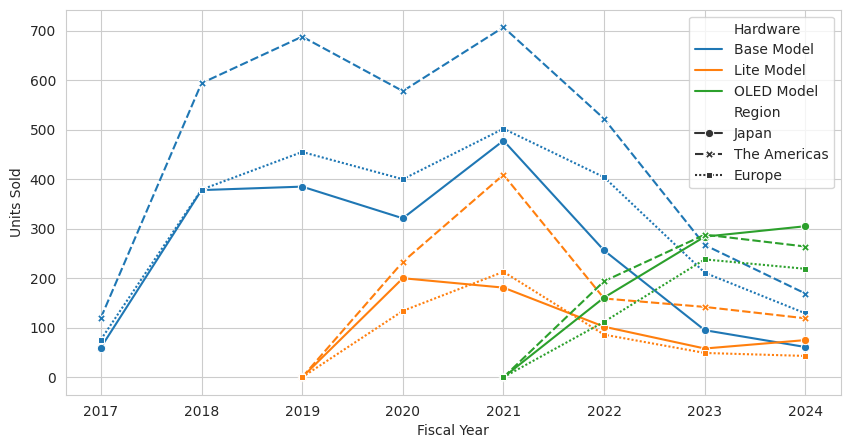

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # Para extrair os anos corretamente

# Carregar a planilha corretamente
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4  # Ignorar as primeiras 4 linhas
)

# Limpar nomes das colunas
df_hardware.columns = df_hardware.columns.str.strip()

# Remover colunas totalmente vazias e a coluna 'Life to Date'
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

# Converter para formato longo (melt)
df_melted = df_hardware.melt(
    id_vars=['Hardware', 'Region'],
    var_name='Fiscal Year',
    value_name='Units Sold'
)

# Limpar espaços extras
df_melted['Region'] = df_melted['Region'].str.strip()
df_melted['Hardware'] = df_melted['Hardware'].str.strip()

# Substituir valores nulos (NaN) por 0
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# **Corrigir os anos fiscais**
df_melted['Fiscal Year'] = df_melted['Fiscal Year'].apply(lambda x: int(re.search(r'\d{4}', x).group()) if pd.notna(x) else None)

# Filtrar apenas os dados de Hardware
modelos_destacados = ['Total (all) Hardware', 'Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']

df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# **Definir os anos de lançamento corretos**
anos_lancamento = {
    'Base Model': 2017,
    'Lite Model': 2019,
    'OLED Model': 2021
}

# **Remover entradas onde o modelo ainda não existia**
df_hardware_sales = df_hardware_sales[
    df_hardware_sales.apply(lambda row: row['Fiscal Year'] >= anos_lancamento.get(row['Hardware'], 2017), axis=1)
]

# ---- Gráfico de Hardware ----
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)

🔍 Regiões antes de qualquer filtragem: [nan 'Japan' 'The Americas' 'Europe' 'Other' 'World Total']

🔍 Amostra antes de filtrar regiões:
      Hardware        Region Fiscal Year  Units Sold
1   Base Model         Japan    FY3/2017        60.0
2   Base Model  The Americas    FY3/2017       120.0
3   Base Model        Europe    FY3/2017        76.0
4   Base Model         Other    FY3/2017        18.0
5   Base Model   World Total    FY3/2017       274.0
6   Lite Model         Japan    FY3/2017         0.0
7   Lite Model  The Americas    FY3/2017         0.0
8   Lite Model        Europe    FY3/2017         0.0
9   Lite Model         Other    FY3/2017         0.0
10  Lite Model   World Total    FY3/2017         0.0

🔍 Regiões depois do filtro: ['Japan' 'The Americas' 'Europe']

🔍 Amostra de The Americas:
      Hardware        Region Fiscal Year  Units Sold
2   Base Model  The Americas    FY3/2017       120.0
7   Lite Model  The Americas    FY3/2017         0.0
12  OLED Model  The Americas   

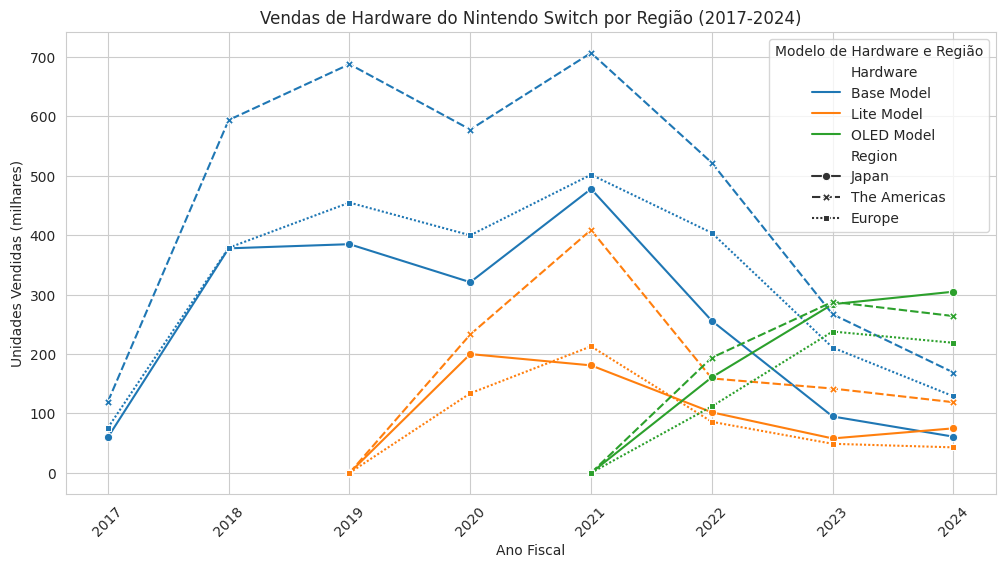

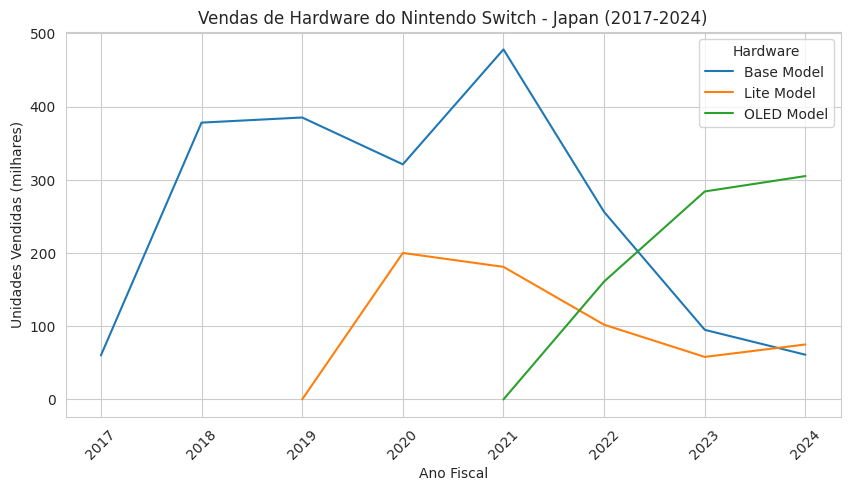

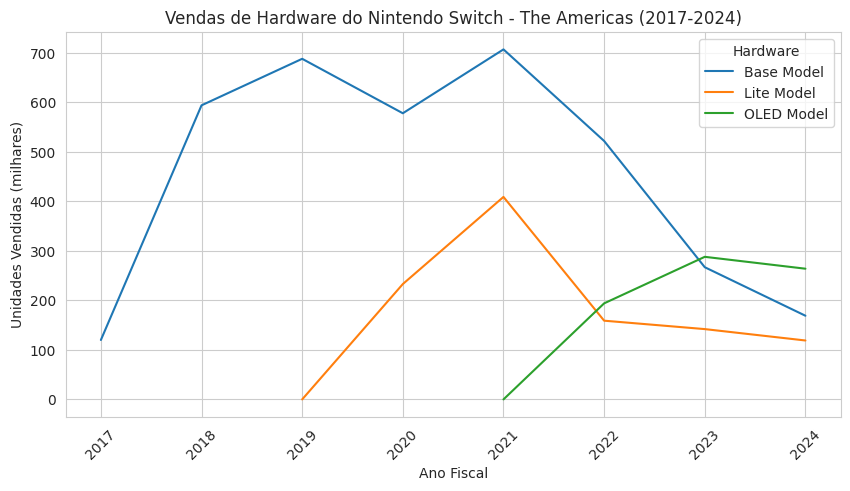

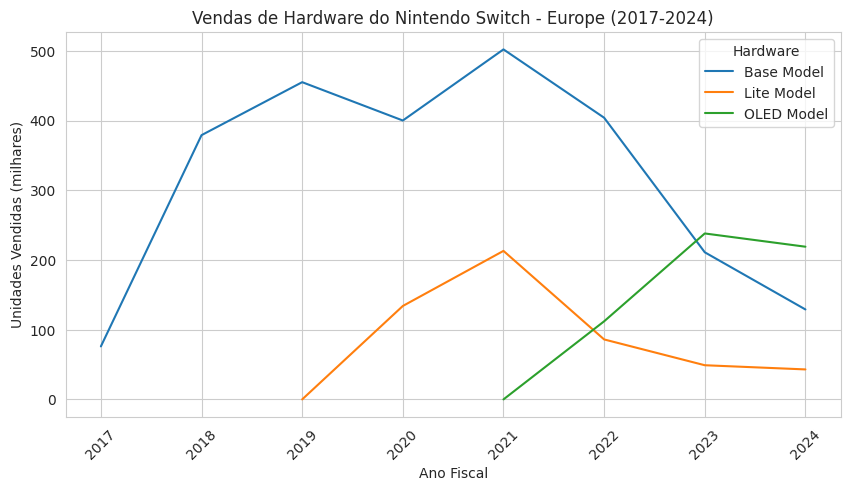

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 📌 1. Carregar os dados
df_hardware = pd.read_excel(
    's3://fabiopojo1987-mvp3-2025-puc-rio/nintendo-switch-consolidated-sales-2017-2024.xlsx',
    sheet_name='Hardware',
    engine='openpyxl',
    storage_options={'anon': True},
    skiprows=4  # Ignorar as primeiras 4 linhas
)

# 📌 2. Limpar nomes das colunas
df_hardware.columns = df_hardware.columns.str.strip()

# 📌 3. Remover colunas vazias e a coluna 'Life to Date'
df_hardware = df_hardware.dropna(axis=1, how='all')
df_hardware = df_hardware.drop(columns=['Life\nto date'], errors='ignore')

# 📌 4. Converter para formato longo (unpivot)
df_melted = df_hardware.melt(
    id_vars=['Hardware', 'Region'],
    var_name='Fiscal Year',
    value_name='Units Sold'
)

# 📌 5. Remover espaços extras dos nomes das regiões
df_melted['Region'] = df_melted['Region'].str.strip()

# 📌 6. Corrigir nomes das regiões para garantir que aparecem corretamente
df_melted['Region'] = df_melted['Region'].replace({
    'Americas': 'The Americas',
    'EU': 'Europe',
    'Total': 'World Total'
})

# 📌 7. Exibir regiões únicas antes do filtro
print("🔍 Regiões antes de qualquer filtragem:", df_melted['Region'].unique())

# 📌 8. Substituir valores NaN em "Units Sold" por 0
df_melted['Units Sold'] = df_melted['Units Sold'].fillna(0)

# 📌 9. Filtrar os modelos e regiões desejadas
modelos_destacados = ['Base Model', 'Lite Model', 'OLED Model']
regioes_destacadas = ['Japan', 'The Americas', 'Europe']

df_hardware_sales = df_melted[df_melted['Hardware'].isin(modelos_destacados)]

# 📌 10. Exibir amostra ANTES da filtragem das regiões
print("\n🔍 Amostra antes de filtrar regiões:")
print(df_hardware_sales.head(10))

# 📌 11. Aplicar filtro para as regiões
df_hardware_sales = df_hardware_sales[df_hardware_sales['Region'].isin(regioes_destacadas)]

# 📌 12. Exibir regiões depois do filtro
print("\n🔍 Regiões depois do filtro:", df_hardware_sales['Region'].unique())

# 📌 13. Exibir amostra para 'The Americas' e 'Europe'
print("\n🔍 Amostra de The Americas:")
print(df_hardware_sales[df_hardware_sales['Region'] == 'The Americas'].head())

print("\n🔍 Amostra de Europe:")
print(df_hardware_sales[df_hardware_sales['Region'] == 'Europe'].head())

# 📌 14. Corrigir anos fiscais extraindo apenas os números
df_hardware_sales['Fiscal Year'] = df_hardware_sales['Fiscal Year'].apply(
    lambda x: re.search(r'\d{4}', x).group() if re.search(r'\d{4}', x) else None
)

# 📌 15. Remover anos inválidos e converter para inteiro
df_hardware_sales = df_hardware_sales.dropna(subset=['Fiscal Year'])
df_hardware_sales['Fiscal Year'] = df_hardware_sales['Fiscal Year'].astype(int)

# 📌 16. Definir os anos de lançamento dos modelos para remover dados inválidos
anos_lancamento = {
    'Base Model': 2017,
    'Lite Model': 2019,
    'OLED Model': 2021
}

# 📌 17. Remover entradas onde o modelo ainda não existia
df_hardware_sales = df_hardware_sales[
    df_hardware_sales.apply(lambda row: row['Fiscal Year'] >= anos_lancamento.get(row['Hardware'], 2017), axis=1)
]

# 📌 18. Verificar se o DataFrame ainda tem dados após a filtragem
print("\n📊 Tamanho final do DataFrame:", df_hardware_sales.shape)
print("\n🔍 Amostra final do DataFrame:")
print(df_hardware_sales.head())

# 📌 19. Ajustar o estilo do gráfico
sns.set_style("whitegrid")

# 📌 20. Criar gráfico principal
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_hardware_sales,
    x='Fiscal Year',
    y='Units Sold',
    hue='Hardware',
    style='Region',
    markers=True
)
plt.title('Vendas de Hardware do Nintendo Switch por Região (2017-2024)')
plt.xlabel('Ano Fiscal')
plt.ylabel('Unidades Vendidas (milhares)')
plt.xticks(rotation=45)
plt.legend(title='Modelo de Hardware e Região')
plt.grid(True)
plt.show()

# 📌 21. Criar gráficos separados por região
for region in regioes_destacadas:
    plt.figure(figsize=(10, 5))
    sns.lineplot(
        data=df_hardware_sales[df_hardware_sales['Region'] == region],
        x='Fiscal Year',
        y='Units Sold',
        hue='Hardware',
        markers=True
    )
    plt.title(f'Vendas de Hardware do Nintendo Switch - {region} (2017-2024)')
    plt.xlabel('Ano Fiscal')
    plt.ylabel('Unidades Vendidas (milhares)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [ ]:
# 📌 1. Mostrar todas as regiões presentes no DataFrame original
print("\n🔍 Regiões antes de qualquer filtragem:", df_melted['Region'].unique())

# 📌 2. Mostrar os dados antes do filtro de região
print("\n🔍 Amostra antes da filtragem de regiões:")
print(df_melted[df_melted['Region'] == 'The Americas'].head(10))

# 📌 3. Verificar se há dados NaN na coluna de vendas antes da filtragem
print("\n📌 Valores NaN antes da filtragem por região:")
print(df_melted[df_melted['Region'] == 'The Americas']['Units Sold'].isna().sum())

# 📌 4. Mostrar dados após aplicar o filtro de Hardware
print("\n🔍 Amostra depois da filtragem de hardware e antes da filtragem de região:")
print(df_hardware_sales[df_hardware_sales['Region'] == 'The Americas'].head(10))

# 📌 5. Mostrar se ainda há dados depois da filtragem final
print("\n📌 Tamanho final do DataFrame após todas as filtragens:", df_hardware_sales.shape)



🔍 Regiões antes de qualquer filtragem: [nan 'Japan' 'The Americas' 'Europe' 'Other' 'World Total']

🔍 Amostra antes da filtragem de regiões:
      Hardware        Region Fiscal Year  Units Sold
2   Base Model  The Americas    FY3/2017       120.0
7   Lite Model  The Americas    FY3/2017         0.0
12  OLED Model  The Americas    FY3/2017         0.0
18  Base Model  The Americas    FY3/2018       594.0
23  Lite Model  The Americas    FY3/2018         0.0
28  OLED Model  The Americas    FY3/2018         0.0
34  Base Model  The Americas    FY3/2019       688.0
39  Lite Model  The Americas    FY3/2019         0.0
44  OLED Model  The Americas    FY3/2019         0.0
50  Base Model  The Americas    FY3/2020       578.0

📌 Valores NaN antes da filtragem por região:
0

🔍 Amostra depois da filtragem de hardware e antes da filtragem de região:
      Hardware        Region  Fiscal Year  Units Sold
2   Base Model  The Americas         2017       120.0
18  Base Model  The Americas         2018   

5-	 Análise dos gráficos
As vendas do Nintendo Switch apresentaram variações ao longo dos anos, influenciadas por diversos fatores econômicos, logísticos e mercadológicos. A seguir, são destacados alguns dos principais aspectos que afetaram essas variações.
5.1-  Escassez de componentes e problemas na cadeia de suprimentos
A pandemia de COVID-19 resultou em uma escassez global de semicondutores, impactando diretamente a produção de consoles, incluindo o Nintendo Switch.
No trimestre encerrado em junho de 2022, as vendas do console caíram 23% em relação ao mesmo período do ano anterior, totalizando 3,43 milhões de unidades vendidas. A Nintendo atribuiu essa queda à dificuldade na obtenção de componentes essenciais para a fabricação do console.
5.2-  Inflação e diversificação das opções de entretenimento
Em fevereiro de 2023, a Nintendo destacou que fatores como a inflação e a ampliação das opções de entretenimento contribuíram para a desaceleração das vendas do Switch, especialmente nas Américas e na Europa. No Japão, no entanto, o console continuou apresentando altas vendas.
O então presidente da Nintendo mencionou que o aumento dos preços e a concorrência com outros dispositivos, como o Xbox, PlayStation 4 e PlayStation 5, impactaram negativamente a demanda pelo console. Reduzindo a mesma.
Além disso, foi anunciado o Nintendo Switch 2, com lançamento previsto para 5 de junho de 2025, ao preço inicial de US$ 449,99 nos Estados Unidos. O novo console contará com melhorias como uma tela LCD de 7,9 polegadas, 256 GB de armazenamento interno e novos recursos de chat e vídeo. Analistas preveem que o Switch 2 manterá uma demanda elevada, apesar dos desafios econômicos e das tensões comerciais globais.
6-	 Conclusão
A realização deste trabalho representou um grande desafio para mim, pois envolveu o aprendizado e a aplicação de novas técnicas para coleta, análise e visualização de dados.
Técnicas estas que ainda não me havia ainda me familiarizado.
Apesar das dificuldades, foi possível alcançar 90% dos objetivos inicialmente planejados.
Ainda há espaço para melhorias, visto que a análise e a apresentação dos dados deste trabalho podem ser aprimoradas.
A necessidade do desenvolvimento de competências nessa área continuará sendo uma prioridade, com investimentos futuros em cursos e especializações para aprofundamento no tema.



 Referências utilizadas para pesquisa e desenvolvimento do projeto

GLOBELIVE MEDIA. Nintendo Switch sales drop 33% in Japan due to component shortages. Disponível em:
https://globelivemedia.com/gaming/nintendo-switch-sales-drop-33-in-japan-due-to-component-shortages/. Acesso em: 31 mar. 2025.
NINTENDO. Consolidated Sales Data. Disponível em:
https://www.nintendo.co.jp/ir/finance/historical_data/xls/consolidated_sales_e2403.xlsx. Acesso em: 31 mar. 2025.
NINTENDO. Financial Results and Sales Data. Disponível em:
http://www.nintendo.co.jp/ir/en/finance/hard_soft/index.html Acesso em: 31 mar. 2025.
THE VERGE. Nintendo Switch Q1 2023 earnings: sales software and hardware down due to semiconductor shortage. Disponível em:
https://www.theverge.com/2022/8/3/23290085/nintendo-switch-q1-2023-earnings-sales-software-hardware-down-semiconductor-shortage. Acesso em: 31 mar. 2025..
WALL STREET JOURNAL. Nintendo Switch 2 announced: features and launch date. Disponível em:
https://www.wsj.com/business/media/nintendo-switch-2-announced-features-05a72dc0. Acesso em: 31 mar. 2025.

